# Sigmoid

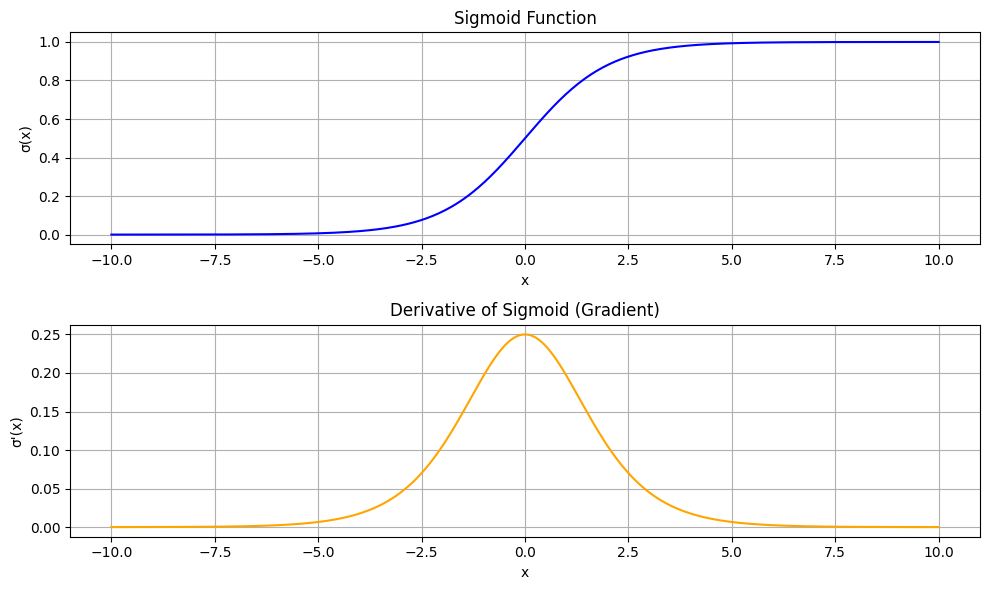

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# تعريف دالة sigmoid
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# تعريف المشتقة بتاعتها
def sigmoid_derivative(x):
    s = sigmoid(x)
    return s * (1 - s)

# نولّد قيم من -10 إلى 10
x = np.linspace(-10, 10, 400)

# نحسب القيم
y = sigmoid(x)
y_derivative = sigmoid_derivative(x)

# نرسم الشكلين
plt.figure(figsize=(10,6))

# دالة sigmoid
plt.subplot(2,1,1)
plt.plot(x, y, color='blue')
plt.title('Sigmoid Function')
plt.xlabel('x')
plt.ylabel('σ(x)')
plt.grid(True)

# مشتقة sigmoid
plt.subplot(2,1,2)
plt.plot(x, y_derivative, color='orange')
plt.title('Derivative of Sigmoid (Gradient)')
plt.xlabel('x')
plt.ylabel("σ'(x)")
plt.grid(True)

plt.tight_layout()
plt.show()


القصد ان مقدار التغير بيقل جدا حولين الصفر يمين اة شمال فا بالتلى لو فى ارقام كبيره شويه الليرننج هيكون اقل ما يمكن لحد اما القيم الراجعه من الجردياند تختفى ويبقى مفيش تعليم اصلا هى دى مشكله السيجمويد فا بالتالى ينصح الاستخدام فى <br>
✅ الاستخدام

في طبقة الإخراج (Output Layer) في حالة الـ Binary Classification
يعني لما النموذج بيتنبأ بحاجة من نوعين فقط:
مثلاً:

Spam / Not Spam

Tumor / No Tumor

0 / 1

🎯 ليه بنستخدمها هنا:

لأن ناتجها بين 0 و 1 → ينفع نعتبره احتمال.
مثلاً لو الناتج = 0.8 → النموذج بيقولك “في احتمال 80% إن الرسالة Spam”.

الدالة ناعمة وبتتحول تدريجيًا من 0 إلى 1 → فمناسبة للتنبؤ بالاحتمالات.

⚠️ وليه مانستخدمهاش في الـ Hidden Layers:

لأننا فهمنا إن في الأطراف (قيم كبيرة أو صغيرة جدًا) الـ Gradient ≈ 0 →
وده بيعمل Vanishing Gradient Problem → الشبكة هتتعلم ببطء جدًا أو تتوقف.
يبقى نحطها بس في الآخر (Output)، مش في النص.

# Tanh

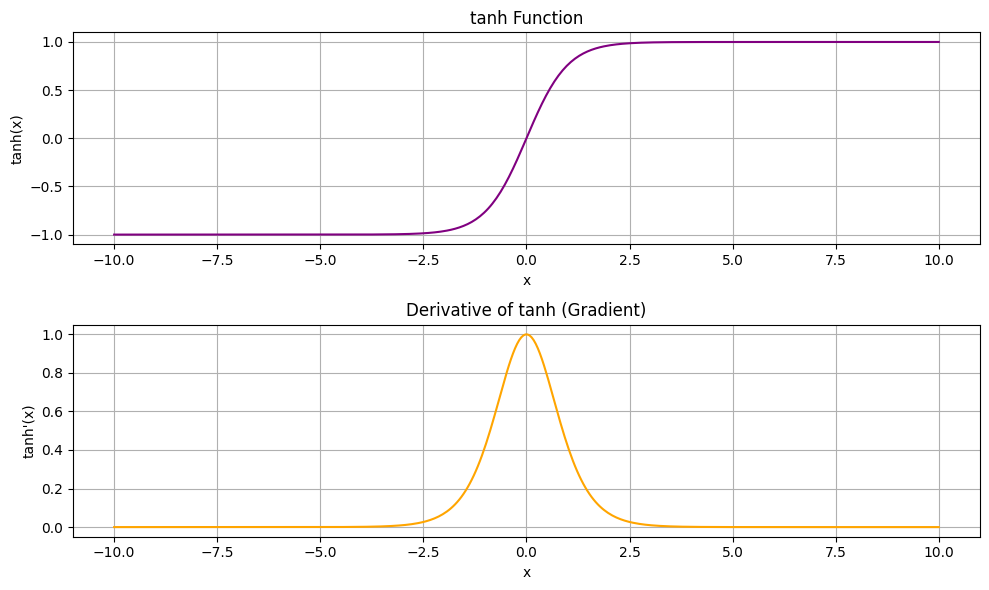

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# دالة tanh
def tanh(x):
    return np.tanh(x)

# مشتقة tanh
def tanh_derivative(x):
    return 1 - np.tanh(x)**2

x = np.linspace(-10, 10, 400)
y = tanh(x)
y_prime = tanh_derivative(x)

plt.figure(figsize=(10,6))

# الدالة نفسها
plt.subplot(2,1,1)
plt.plot(x, y, color='purple')
plt.title('tanh Function')
plt.xlabel('x')
plt.ylabel('tanh(x)')
plt.grid(True)

# المشتقة
plt.subplot(2,1,2)
plt.plot(x, y_prime, color='orange')
plt.title('Derivative of tanh (Gradient)')
plt.xlabel('x')
plt.ylabel("tanh'(x)")
plt.grid(True)

plt.tight_layout()
plt.show()


هى نسخه احسن من السيجمويد محلتش غير انها قللت انحياز القيم لى اموجب وخلتها متسنتره اكتر حولين الصفر بس لسه نفس مشكله الفانشنج للجرادينت

# ReLU

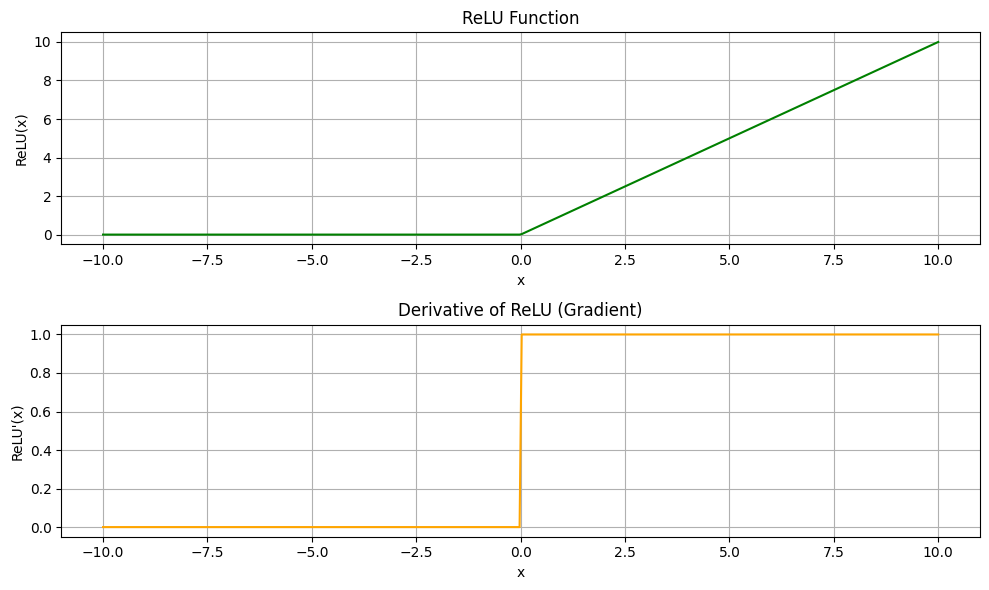

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# دالة ReLU
def relu(x):
    return np.maximum(0, x)

# مشتقة ReLU
def relu_derivative(x):
    return np.where(x > 0, 1, 0)

x = np.linspace(-10, 10, 400)
y = relu(x)
y_prime = relu_derivative(x)

plt.figure(figsize=(10,6))

# الدالة نفسها
plt.subplot(2,1,1)
plt.plot(x, y, color='green')
plt.title('ReLU Function')
plt.xlabel('x')
plt.ylabel('ReLU(x)')
plt.grid(True)

# المشتقة
plt.subplot(2,1,2)
plt.plot(x, y_prime, color='orange')
plt.title('Derivative of ReLU (Gradient)')
plt.xlabel('x')
plt.ylabel("ReLU'(x)")
plt.grid(True)

plt.tight_layout()
plt.show()


## 🎯 أولًا: افتكر المشكلة اللي حصلت قبل كده

لما استخدمنا **Sigmoid** أو **Tanh**، حصل مشكلتين:

1. **Vanishing Gradient Problem**
   → لما القيم بتدخل كبيرة أو سالبة جدًا، المشتقة قربت من الصفر.
   → يعني الـ **gradient** اللي بيستخدمه التدريب لتحديث الأوزان بقى صغير جدًا.
   → النيورون تقريبًا وقف عن التعلم.

2. **التعقيد الحسابي**
   → الـ sigmoid/tanh فيها أسس (e^x) → حسابها أبطأ شوية.

---

## ⚡ ثانيًا: جات فكرة ReLU ببساطة

قالوا طيب... إحنا ليه معقدين الموضوع؟ 😅
إيه رأيك نعمل دالة **بسيطة جدًا** تحقق الحاجات دي:

* سريعة في الحساب
* لو القيم موجبة → تفضل تزيد → gradient قوي
* لو القيم سالبة → نوقفها (ما نديش إشارة سالبة ملهاش فايدة)

فطلعوا بالدالة:

[
f(x) = \max(0, x)
]

---

## 🧠 ثالثًا: خلينا نفسرها بالمنطق الفيزيائي شوية

تخيل النيورون عامل زي **مفتاح كهرباء**:

* لو الإشارة (x) **سالبة أو صفر** → *مافيش تيار* → **Output = 0**
* لو الإشارة **موجبة** → *يفتح السكة للتيار* → **Output = x نفسه**

يعني بتخلي النيورون “ينشط” **فقط لما الإشارة موجبة**.
وده بيدّي الشبكة سلوك **غير خطي (Non-linear)** بسيط جدًا وسهل الحساب.

---

## 🔍 رابعًا: طب ليه بتخلّي الـ gradient كويس؟

المشتقة بتاعتها بسيطة جدًا:

[
f'(x) =
\begin{cases}
1 & \text{if } x > 0 \
0 & \text{if } x \le 0
\end{cases}
]

وده معناه:

* لو القيمة موجبة → **gradient = 1**
  ⇒ يعني التحديثات في الأوزان بتحصل بقوة، الشبكة بتتعلم بسرعة.
* لو القيمة سالبة → **gradient = 0**
  ⇒ النيورون مش بيغيّر وزنه، كأنه مش شغال في الجزء ده.

فالنتيجة؟

* مافيش **Vanishing Gradient** في الجزء الموجب.
* الحساب بسيط جدًا (مافيش e^x ولا حاجة).

---

## 💥 خامسًا: إزاي بتحل مشكلة اللي قبلها تحديدًا

| المشكلة                          | سببها في Sigmoid/Tanh          | الحل في ReLU                              |
| -------------------------------- | ------------------------------ | ----------------------------------------- |
| Vanishing Gradient               | المشتقة صغيرة جدًا عند الأطراف | المشتقة = 1 في الجزء الموجب → ثابتة وقوية |
| بطء التدريب                      | العمليات فيها e^x              | ReLU = max(0, x) → عملية بسيطة جدًا       |
| المخرجات مش متمركزة حوالين الصفر | Sigmoid (0→1)                  | ReLU مش centered لكنها بتتعلم بسرعة كبيرة |

---

## ⚠️ سادسًا: طيب ليه ممكن تموت Neurons؟

لو القيم اللي داخلة لنيورون كلها سالبة مثلًا،
يبقى الـ ReLU بتطلع 0 دايمًا → والمشتقة 0 → **النيورون ميت** (ما بيتحدثش خالص).

ودي بنسميها:

> **Dead Neuron Problem**

علشان كده فيه أنواع محسّنة منها زي:

* **Leaky ReLU**: بدل ما الصفر في الجزء السالب، بتخليه 0.01x مثلاً.
* **Parametric ReLU** و **ELU** وغيرها…

---

## 🧩 سابعًا: خلاصة منطقية

تقدر تقول إن ReLU عملت **Trade-off ذكي**:

| النقطة             | ReLU عملت إيه؟                     |
| ------------------ | ---------------------------------- |
| المعادلات المعقدة  | شالتها تمامًا                      |
| بطء التدريب        | خلته أسرع بكتير                    |
| Vanishing Gradient | اختفى في النطاق الموجب             |
| تمثيل علاقات سالبة | موجودة جزئيًا (بتقطع الجزء السالب) |
| مشكلة جديدة        | Dead Neurons                       |

---

يعني باختصار:

> ReLU = سرعة × بساطة × استقرار في التدريب

---



## 🧨 أولًا: مشاكل ReLU

### 1. **Dead Neurons Problem**

🔹 **المشكلة:**
لو الـ input اللي داخل النيورون دايمًا ≤ 0 →
الـ ReLU بتدي 0 دايمًا → المشتقة كمان 0 →
يبقى النيورون ده خلاص “ميت” ومش بيتعلم.

🔹 **إزاي بتحصل؟**
لو وزن النيورون **تغير أثناء التدريب** بطريقة خلت ناتج (Wx + b) سلبي دايمًا،
يبقى خلاص مفيش أمل يرجع موجب تاني لأن gradient = 0.
وده بيخلي بعض النيورونات **تتوقف نهائيًا عن المشاركة في التعلم**.

🔹 **الحل:**
ظهر أنواع مطوّرة من ReLU علشان تحافظ على البساطة بس تعالج الموت ده:

| النوع                                 | المعادلة                                                | الميزة                                        |
| ------------------------------------- | ------------------------------------------------------- | --------------------------------------------- |
| **Leaky ReLU**                        | ( f(x) = x \text{ if } x>0, \ 0.01x \text{ otherwise} ) | الجزء السالب مش صفر خالص → مفيش موت كامل      |
| **Parametric ReLU (PReLU)**           | زي Leaky بس بدل 0.01 بنخليها متعلّمة (learnable)        | الشبكة تختار قيمة التسريب الأنسب بنفسها       |
| **ELU (Exponential Linear Unit)**     | الجزء السالب بيستخدم e^x بدل الصفر                      | بتخلي القيم السالبة لينة أكتر، فبتتجنب التجمد |
| **GELU (Gaussian Error Linear Unit)** | شكلها أنعم رياضيًا وبتستخدمها Transformers              | دالة “ناعمة” جدًا ومفيش قطع مفاجئ             |

---

### 2. **Not Zero-Centered**

🔹 يعني مخرجاتها كلها ≥ 0، وده بيخلي المتوسط (mean) موجب.
وده ممكن يخلي **الـ gradients في بعض الطبقات متحيزة (biased)** ناحية اتجاه معين.

🔹 **الحل:**
مش مشكلة قاتلة، لكن بيتعالج غالبًا عن طريق:

* **Batch Normalization**
* أو استخدام دوال centered زي **tanh** في أول الطبقات أحيانًا.

---

### 3. **Unbounded Output**

🔹 القيم الموجبة ممكن تكبر جدًا (لأن ReLU = x لما x>0).
ده ممكن يخلي بعض الطبقات تتضخم فيها القيم →
تحتاج **Normalization** علشان تمنع الانفجار في القيم.

---

## 🚀 ثانيًا: ليه رغم كل ده ReLU هي الملكة؟

لأنها ببساطة:

* **سريعة** (مافيهاش أسس أو عمليات معقدة).
* **تحافظ على Gradient قوي** في الجزء الموجب → التعلم أسرع.
* **تتعامل كويس جدًا** مع بيانات كبيرة ومعمقة (Deep Networks).
* **سهل جدًا اشتقاقها وتطبيقها على الـ GPU**.

---

## 💡 ثالثًا: الاستخدامات في الواقع

| المجال                       | استخدام ReLU                                                                              |
| ---------------------------- | ----------------------------------------------------------------------------------------- |
| **CNNs (Computer Vision)**   | تقريبًا في كل الطبقات المخفية بعد الـ convolution، لأنها بتخلي الصور تتعلم الملامح بسرعة. |
| **Feedforward / MLPs**       | الدالة الأساسية في الـ hidden layers بدل sigmoid/tanh.                                    |
| **RNN Variants**             | أحيانًا في الطبقات الداخلية (لكن مش دائمًا، لأن RNNs تحتاج دوال ناعمة أكتر).              |
| **Transformers (BERT, GPT)** | بيستخدموا نسخ متطورة منها زي **GELU**.                                                    |

---

## ⚖️ رابعًا: مقارنة شاملة بعد التطوير

| النوع          | الشكل                         | معالجة المشاكل                | مميزات إضافية                     |
| -------------- | ----------------------------- | ----------------------------- | --------------------------------- |
| **ReLU**       | max(0, x)                     | ❌                             | بسيطة وسريعة                      |
| **Leaky ReLU** | max(0.01x, x)                 | ✅ Dead Neuron                 | يحافظ على التعلم حتى بالسالب      |
| **PReLU**      | max(αx, x) مع α متعلم         | ✅ Dead Neuron                 | مرن أكتر                          |
| **ELU**        | x لو موجب، α(e^x - 1) لو سالب | ✅ Dead Neuron + Zero-centered | ناعمة أكتر، أداء ممتاز            |
| **GELU**       | تقريبًا x * Φ(x)              | ✅ بالكامل                     | الأفضل حاليًا في الـ Transformers |

---

## 🔚 خلاصة الفكر كله

> ReLU غيرت شكل الـ Deep Learning لأنها:
>
> * بسيطة جدًا
> * بتتعلم أسرع
> * بتحافظ على gradients قوية
> * ومع شوية تعديلات (Leaky, ELU, GELU) بقت تقريبًا **الحل المثالي لكل الشبكات**

---

# Softmax

In [4]:
import numpy as np

# دالة Softmax
def softmax(z):
    exp_values = np.exp(z - np.max(z))  # لحماية من overflow
    return exp_values / np.sum(exp_values)

z = np.array([2.0, 0.0, -2.0])
probabilities = softmax(z)

print("Input:", z)
print("Softmax probabilities:", probabilities)
print("Sum of probabilities:", np.sum(probabilities))


Input: [ 2.  0. -2.]
Softmax probabilities: [0.86681333 0.11731043 0.01587624]
Sum of probabilities: 0.9999999999999999


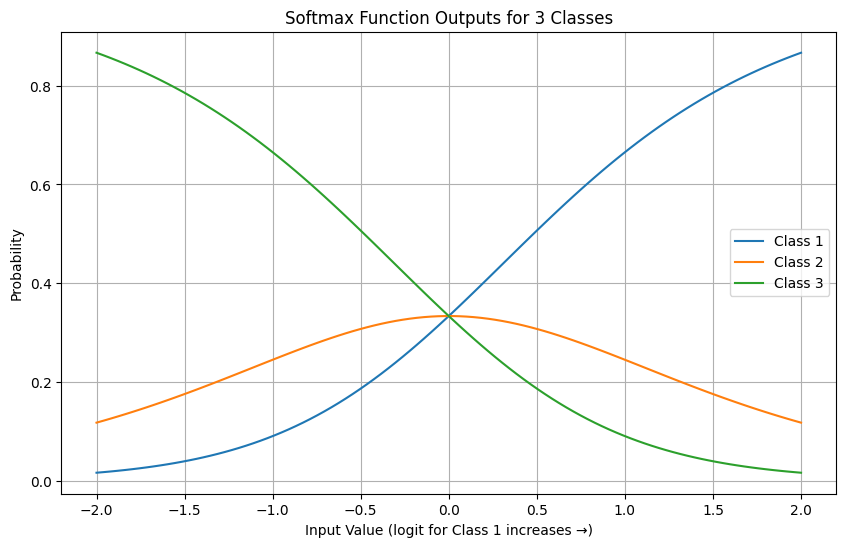

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# دالة Softmax
def softmax(x):
    exp_x = np.exp(x - np.max(x))  # عشان نتجنب overflow
    return exp_x / np.sum(exp_x)

# نعمل مجموعة قيم تمثل الـ logits (قبل الـ softmax)
x = np.linspace(-2, 2, 100)
# نطبّق softmax على كل مجموعة (كل صف يمثل output من 3 neurons مثلاً)
softmax_outputs = np.array([softmax([i, 0, -i]) for i in x])

plt.figure(figsize=(10,6))
plt.plot(x, softmax_outputs[:,0], label='Class 1')
plt.plot(x, softmax_outputs[:,1], label='Class 2')
plt.plot(x, softmax_outputs[:,2], label='Class 3')

plt.title('Softmax Function Outputs for 3 Classes')
plt.xlabel('Input Value (logit for Class 1 increases →)')
plt.ylabel('Probability')
plt.legend()
plt.grid(True)
plt.show()


## 🧠 **Softmax Function**

---

## 🎯 أولًا: الفكرة العامة

الـ **Softmax** بنستخدمها في آخر طبقة من الشبكة (Output Layer)
لما نكون بنعمل **تصنيف (Classification)**
زي: “الصورة دي قطة ولا كلب ولا طيارة؟” ✈️🐶🐱

بتحوّل المخرجات (اللي ممكن تكون أي أرقام) إلى **احتمالات (Probabilities)**
وكل القيم دي بتجمع = 1.

---

## ⚙️ المعادلة

لو عندك ناتج الشبكة قبل الـ Softmax بالشكل ده:
[
z = [z_1, z_2, ..., z_n]
]

يبقى:
[
Softmax(z_i) = \frac{e^{z_i}}{\sum_{j=1}^{n} e^{z_j}}
]

---

## 📘 التفسير المنطقي

خلينا نفكها بالراحة:

1. كل قيمة ( z_i ) بتمثل مدى "ثقة" النموذج إن العينة تنتمي للفئة دي.
2. بنرفعها للأسس ( e^{z_i} ) علشان:

   * القيم الكبيرة تزيد قوتها أكتر (exponential boost).
   * القيم الصغيرة تقل نسبيًا.
3. بعدين بنقسم على مجموع الكل → علشان المجموع = 1
   (كأننا عملنا normalization).

---

## 🧩 مثال بسيط

قول إن الشبكة طلعت نواتج (قبل Softmax):

| الفئة | z  | e^z   | النسبة بعد القسمة              |
| ----- | -- | ----- | ------------------------------ |
| Cat   | 2  | 7.389 | 7.389 / (7.389+1+0.135) = 0.86 |
| Dog   | 0  | 1     | 0.12                           |
| Bird  | -2 | 0.135 | 0.015                          |

يعني:
[
Softmax = [0.86, 0.12, 0.015]
]

النتيجة بتقول:

> النموذج شايف الصورة بنسبة 86% قطة 🐱

---

## 📉 الكود التجريبي

```python
import numpy as np

# دالة Softmax
def softmax(z):
    exp_values = np.exp(z - np.max(z))  # لحماية من overflow
    return exp_values / np.sum(exp_values)

z = np.array([2.0, 0.0, -2.0])
probabilities = softmax(z)

print("Input:", z)
print("Softmax probabilities:", probabilities)
print("Sum of probabilities:", np.sum(probabilities))
```

هتلاحظ إن المخرجات كلها موجبة ومجموعها = 1
وده بيخليها مثالية كاحتمالات.

---

## 🧮 المشتقة (Gradient)

المشتقة بتاعتها مش بسيطة زي ReLU،
لكن المهم إنّها **قابلة للاشتقاق** وبتشتغل تمام مع خوارزمية **Backpropagation**.

وغالبًا بتتربط مع **Cross-Entropy Loss**
علشان الترينينج يكون مستقر وسهل حسابيًا.

---

## ⚖️ المميزات والعيوب

| العنصر           | التوضيح                                                                                                   |
| ---------------- | --------------------------------------------------------------------------------------------------------- |
| **الوظيفة**      | تحويل المخرجات لأرقام بين 0 و1 تمثل احتمالات.                                                             |
| **المميزات**     | سهلة الفهم، المخرجات تقدر تتفسر كاحتمالات، ممتازة في التصنيف متعدد الفئات.                                |
| **العيوب**       | لو واحدة من القيم كبيرة جدًا، ممكن تعمل overflow (عشان كده بنطرح max(z) قبل e^z).                         |
| **مشكلة إضافية** | أحيانًا النموذج بيكون “واثق جدًا” حتى لو غلط (يعني 0.99 على فئة غلط). بيتحل بالتقنيات زي Label Smoothing. |

---

## 🚀 الاستخدامات

| المجال                              | استخدام Softmax                                                       |
| ----------------------------------- | --------------------------------------------------------------------- |
| **Image Classification (CNNs)**     | في آخر طبقة لتحويل النواتج إلى احتمالات لكل فئة.                      |
| **NLP Models (Transformers, RNNs)** | في آخر طبقة من اللغة لتوقع الكلمة التالية (probability distribution). |
| **Multiclass Problems**             | أي نموذج فيه أكثر من فئة (digits, animals, emotions…).                |

---

## 🔚 الخلاصة المنطقية

> Softmax = طريقة تخلي المخرجات مفهومة كاحتمالات
> وهي المرحلة الأخيرة اللي بتخلي الشبكة “تقرر بثقة” النتيجة النهائية.

---


ممتاز جدًا يا صبحي 🔥
نركّز بقى على **Softmax** بالضبط زي ما عملنا مع اللي قبلها،
ونفهم 3 حاجات:
1️⃣ إيه **المشكلات اللي حلتها**
2️⃣ إيه **عيوبها**
3️⃣ فين **بنستخدمها بالضبط وليه**

---

## 🧩 أولًا: المشكلات اللي حلتها

قبل ما تظهر Softmax، كان في مشكلتين رئيسيتين في إخراج الشبكات العصبية اللي بتتعامل مع التصنيف (Classification):

---

### 🧠 المشكلة 1: مفيش تفسير لاحتمالات

في الخرج (output) العادي، القيم اللي بتطلع من الشبكة ممكن تكون أي حاجة:
مثلاً [4.5, 1.2, -2.3]
— مفيش طريقة نفهم بيها “دي معناها إيه بالضبط” 😕

🔹 **Softmax حلّت ده**
حولت القيم دي إلى احتمالات واضحة ومفهومة:
[0.86, 0.12, 0.02]
يعني النموذج شايف الفئة الأولى بنسبة 86%، وهكذا.

✅ كده بقى عندنا **interpretability** — نقدر نفسر مخرجات الشبكة كاحتمالات منطقية.

---

### 🧠 المشكلة 2: النموذج ما يعرفش يختار فئة واحدة

في التصنيف متعدد الفئات (Multiclass)، الشبكة لازم تختار فئة واحدة من بين N فئة.
لو استخدمنا دالة عادية (زي Sigmoid) لكل فئة لوحدها، ممكن الناتج يكون كده:

| Cat | Dog | Bird |
| --- | --- | ---- |
| 0.7 | 0.6 | 0.8  |

يعني كل الفئات واثقة في نفسها 😅
لكن المفروض يكون في “تنافس” بينهم (probabilities لازم تجمع 1).

🔹 **Softmax حلّت ده**
لأنها بتخلي مجموع المخرجات = 1
يعني كأن كل الفئات بتتقاتل على النسبة المئوية، واللي تاخد أعلى نسبة هي الفائزة 🥇

---

### 🎯 النتيجة:

* الـ Softmax خلت المخرجات **normalized + interpretable + competitive**
* فبقت ممتازة لأي **multiclass classification problem**

---

## ⚠️ ثانيًا: العيوب

رغم أهميتها، الـ Softmax مش كاملة وبيظهر معاها شوية مشاكل في الممارسة الفعلية:

---

### 1. **Overconfidence Problem**

🔹 بتدي احتمالات عالية جدًا حتى لو النموذج غلط.
يعني ممكن تقول “أنا متأكد 99% إن دي قطة” وهي في الحقيقة كلب 🐶

🧩 **الحل:**

* استخدام **Label Smoothing** لتقليل الثقة الزايدة (بتوزع جزء بسيط من الاحتمالية على باقي الفئات).
* أو استخدام طرق **calibration** لاحقًا على المخرجات.

---

### 2. **Numerical Overflow**

🔹 لأن فيها e^z، لو القيم كبيرة جدًا ممكن يحصل Overflow (قيم ضخمة جدًا).

🧩 **الحل البرمجي:**
بنطرح `max(z)` من كل العناصر قبل حساب e^z
(زي ما عملنا في الكود اللي فات) علشان نمنع الانفجار العددي.

---

### 3. **حساسة للقيم الكبيرة**

🔹 لو واحدة من القيم في `z` أكبر من الباقيين بشوية،
الـ Softmax هتديها احتمال قريب من 1، والباقي تقريبًا 0
→ النموذج بيبقى “حاسم زيادة عن اللزوم”، ومش بيعبّر عن الغموض كويس.

---

### 4. **مش مناسبة للتصنيف الثنائي أحيانًا**

🔹 لو عندك **2 فئة بس (Binary Classification)**،
مش محتاج Softmax،
الأبسط تستخدم **Sigmoid** لأنها أسرع وأخف رياضيًا.

---

## 🚀 ثالثًا: الاستخدامات

| المجال                                  | استخدام Softmax                               | السبب                                   |
| --------------------------------------- | --------------------------------------------- | --------------------------------------- |
| **Multiclass Classification**           | آخر طبقة (Output Layer)                       | بتحول القيم إلى احتمالات لكل فئة        |
| **Image Recognition (CNNs)**            | لتحديد نوع الصورة (كلب؟ قطة؟ سيارة؟)          | نقدر نقرأ النتائج بسهولة                |
| **NLP (Language Models, Transformers)** | لتوقع الكلمة التالية في النص                  | بتحول scores لكل كلمة إلى توزيع احتمالي |
| **Speech Recognition**                  | لتصنيف الأصوات إلى حروف أو كلمات              | نفس الفكرة: توزيع احتمالي               |
| **Reinforcement Learning**              | لاختيار الفعل (action) الأنسب من مجموعة أفعال | توزع الاحتمالات على كل قرار ممكن        |

---

## 🧠 الخلاصة المنطقية

> Softmax هي المترجم الأخير للشبكة —
> بتحول أرقام غير مفهومة إلى احتمالات منطقية ومقارنة عادلة بين الفئات.
>
> ✅ حلت مشكلة الفهم والتنافس بين الفئات
> ❌ لكنها بتعاني من الثقة الزايدة والـ overflow العددي

---


# الخلاصه

ده الملخّص اللي هيخليك 👑 “فاهم ومتمكن” من الأربع دوال الأساسية (Sigmoid – Tanh – ReLU – Softmax):
هديك مقارنة شاملة من حيث **الفكرة، الشكل، الاستخدام، المشاكل، والمزايا**،
بطريقة منظمة وسهلة المراجعة.

---

## 🧠 1. Sigmoid Function

[
\sigma(x) = \frac{1}{1 + e^{-x}}
]

### ✅ الفكرة:

تحوّل أي رقم إلى قيمة بين **0 و 1**
تشبه “احتمال” أو “نسبة تفعيل” النيورون.

### 📈 الشكل:

منحنى S ناعم جدًا، بيمر بالنقطة (0, 0.5)

### ⚙️ الاستخدام:

* في الماضي كانت تُستخدم في كل الطبقات.
* دلوقتي نادرًا جدًا، باستثناء:

  * **Output Layer** في **Binary Classification** (فئتين فقط).

### ⚠️ العيوب:

1. **Vanishing Gradient**: الأطراف بتتسطح، فالمشتقة ≈ 0 → التعلم بيوقف.
2. **Not Zero-Centered**: القيم دائمًا موجبة → التدرج (gradient) ممكن يكون في اتجاه واحد فقط، فيبطّئ التعلم.
3. **Expensive Computation**: فيها e^x → أبطأ شوية حسابيًا.

---

## 🔷 2. Tanh Function

[
\tanh(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}}
]

### ✅ الفكرة:

تشبه الـ Sigmoid لكن متمركزة حول الصفر (بين **-1 و 1**).

### 📈 الشكل:

منحنى S بس أوسع وأكتر تمركز حوالين الصفر.

### ⚙️ الاستخدام:

* ممتازة في الطبقات **الوسطى (Hidden Layers)**
  لما القيم تحتاج تكون موجبة وسالبة.
* تُستخدم أحيانًا في **RNNs**.

### ⚠️ العيوب:

1. لسه فيها **Vanishing Gradient** عند الأطراف.
2. أبطأ من ReLU حسابيًا.

### 🎯 الميزة عن Sigmoid:

Zero-centered → الاتجاهات في التدريب بتكون أوضح وأسرع.

---

## 🟩 3. ReLU (Rectified Linear Unit)

[
ReLU(x) = \max(0, x)
]

### ✅ الفكرة:

تحوّل أي قيمة سالبة إلى صفر، وتبقي الموجبة كما هي.
(نيورونات بتشتغل بس لما الـ input موجب).

### 📈 الشكل:

خط أفقي عند الصفر، ثم خط مائل لأعلى بعده.

### ⚙️ الاستخدام:

* أكثر دالة استخدامًا في **Hidden Layers** لكل أنواع الـ Neural Networks (CNN, DNN...).
* سريعة جدًا في الحساب (no exponentials).

### 💪 المشاكل اللي بتحلها:

1. **Vanishing Gradient**: انتهت تقريبًا لأن المشتقة = 1 لما x>0.
2. **حساب أسرع** وأداء أعلى.

### ⚠️ العيوب:

1. **Dead ReLU Problem**: النيورون ممكن “يموت” لو دخل دايمًا قيم سالبة → مشتقة = 0 → مش بيتعلم.
2. **غير Zero-centered** برضو.

### 💡 حلولها:

* استخدام **Leaky ReLU** أو **Parametric ReLU** (تسمح ببعض الميل في الجزء السالب بدل ما يكون صفر تمامًا).

---

## 🟨 4. Softmax Function

[
Softmax(x_i) = \frac{e^{x_i}}{\sum_{j} e^{x_j}}
]

### ✅ الفكرة:

تحوّل مجموعة القيم (logits) إلى **احتمالات مجموعها = 1**
بالتالي تقدر تختار الفئة اللي احتمالها الأعلى.

### ⚙️ الاستخدام:

* دائمًا في **Output Layer** لنماذج **Multi-class Classification**.
* تُستخدم مع **Cross-Entropy Loss**.

### 💪 المزايا:

* القيم كلها بتتحول لاحتمالات مفهومة.
* تميّز الفئة الأقرب للصح.

### ⚠️ العيوب:

1. ممكن تكون **Overconfident** (ترفع احتمال فئة واحدة جدًا حتى لو النموذج مش متأكد).
2. فيها **Numerical Instability** لو القيم كبيرة جدًا → بنطرح max(x) قبل exp لتجنب Overflow.

---

## 🔚 الخلاصة المقارنة 👇

| الخاصية                | Sigmoid         | Tanh                   | ReLU                    | Softmax                       |
| ---------------------- | --------------- | ---------------------- | ----------------------- | ----------------------------- |
| **النطاق**             | 0 → 1           | -1 → 1                 | 0 → ∞                   | 0 → 1 (لكل فئة)               |
| **Zero-centered**      | ❌               | ✅                      | ❌                       | ✅ (احتمالات)                  |
| **Vanishing Gradient** | 😵‍💫 قوي       | 😵‍💫 متوسط            | ✅ لا                    | ❌ مش مشكلة                    |
| **Dead Neurons**       | ❌               | ❌                      | ⚠️ ممكن                 | ❌                             |
| **السرعة الحسابية**    | بطيئة           | أبطأ                   | 💨 سريعة جدًا           | بطيئة نسبيًا                  |
| **أفضل استخدام**       | Output (Binary) | Hidden Layers          | Hidden Layers           | Output (Multi-class)          |
| **حلّت مشكلة؟**        | —               | جعلت التوزيع حول الصفر | أنهت Vanishing Gradient | جعلت المخرجات احتمالات منطقية |

---


# Simple NN for XOR

In [6]:
import numpy as np

# 1️⃣ XOR data
X = np.array([[0,0],
              [0,1],
              [1,0],
              [1,1]])

y = np.array([[0],
              [1],
              [1],
              [0]])

# 2️⃣ Neural network architecture
np.random.seed(42)
input_size = 2
hidden_size = 2
output_size = 1
lr = 0.1  # learning rate

# Initialize weights and biases
W1 = np.random.randn(input_size, hidden_size)
b1 = np.zeros((1, hidden_size))
W2 = np.random.randn(hidden_size, output_size)
b2 = np.zeros((1, output_size))

# 3️⃣ Activation functions
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# 4️⃣ Training loop
for epoch in range(10000):
    # Forward pass
    z1 = np.dot(X, W1) + b1
    a1 = sigmoid(z1)
    z2 = np.dot(a1, W2) + b2
    a2 = sigmoid(z2)

    # Compute error
    error = y - a2

    # Backpropagation
    d_a2 = error * sigmoid_derivative(a2)
    d_a1 = np.dot(d_a2, W2.T) * sigmoid_derivative(a1)

    # Update weights and biases
    W2 += np.dot(a1.T, d_a2) * lr
    b2 += np.sum(d_a2, axis=0, keepdims=True) * lr
    W1 += np.dot(X.T, d_a1) * lr
    b1 += np.sum(d_a1, axis=0, keepdims=True) * lr

    # Print loss occasionally
    if epoch % 1000 == 0:
        loss = np.mean(np.square(error))
        print(f"Epoch {epoch} | Loss: {loss:.4f}")

# 5️⃣ Predictions
print("\nPredictions after training:")
print(a2.round(3))


Epoch 0 | Loss: 0.2558
Epoch 1000 | Loss: 0.2494
Epoch 2000 | Loss: 0.2454
Epoch 3000 | Loss: 0.2047
Epoch 4000 | Loss: 0.1532
Epoch 5000 | Loss: 0.1387
Epoch 6000 | Loss: 0.1336
Epoch 7000 | Loss: 0.1312
Epoch 8000 | Loss: 0.1297
Epoch 9000 | Loss: 0.1288

Predictions after training:
[[0.053]
 [0.496]
 [0.951]
 [0.503]]
